In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
from IPython.display import Image, display
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import warnings
warnings.filterwarnings('ignore')

In [2]:
def view_results(df, description, dif_limit, p_limit, depend_on_metric = True):
    df = df[df['description'] == description]
    list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'eigenvector', 'eigentrust']
    coeff_dict = {}
    for metric in list_metric:
        coeff_dict['coeff_' + metric] = []
    for i in range(df.shape[0]):
        d = eval(df.iloc[i,3])
        for metric in list_metric:
            coeff_dict['coeff_' + metric].append(d[metric])
    for metric in list_metric: 
        df['coeff_' + metric] = coeff_dict['coeff_' + metric]
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    snsplot1 = sns.distplot(df['average_p_value'])
    plt.subplot(1,2,2)
    snsplot2 = sns.distplot(df['dif_mean'])
    if  depend_on_metric == True:
        plt.figure(figsize=(20,10))
        for (i, metric) in zip(range(1,10), list_metric):
            plt.subplot(3,3,i)
            plt.xlabel(metric)
            plt.ylabel('average_p_value')
            plt.scatter(df['coeff_' + metric], df['average_p_value'])
            plt.axis([0, 11, - p_limit, p_limit])

        plt.figure(figsize=(20,10))
        for (i, metric) in zip(range(1,10), list_metric):
            plt.subplot(3,3,i)
            plt.xlabel(metric)
            plt.ylabel('difference of averagу')
            plt.scatter(df['coeff_' + metric], df['dif_mean'])
            plt.axis([0, 11, -dif_limit, dif_limit])

In [3]:
df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells = pd.read_csv('df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells.csv', index_col =0)
df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells['description'].value_counts()

bayes_7_metrics_alpha_00001    80
Name: description, dtype: int64

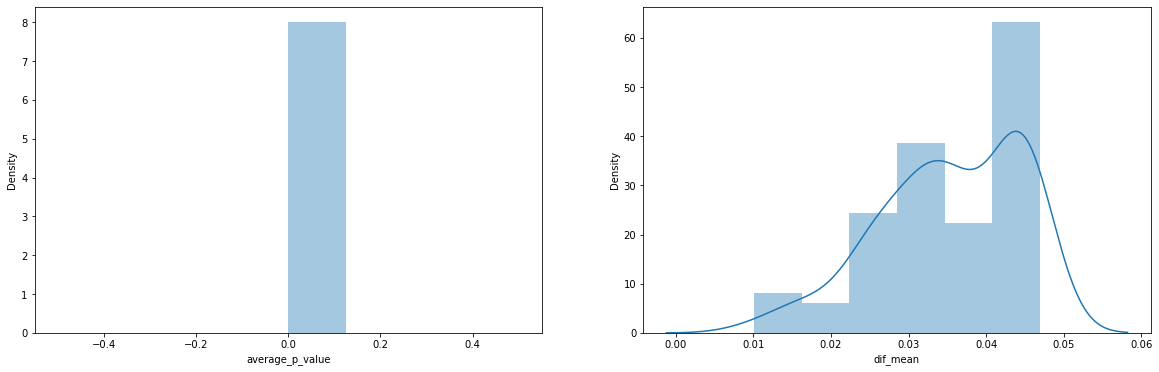

In [4]:
view_results(df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells, 'bayes_7_metrics_alpha_00001', 0.01, 0.0001, depend_on_metric = False)

In [6]:
with open("_max_bayes_Fibroblasts_Induced_Neural_Stem_Cells.json", "r") as read_file:
    max_res = json.load(read_file)
id_max = int(df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells[df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells['dif_mean'] == max_res['target']]['id_folder'])
print(id_max)
df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells[df_search_parameters_Fibroblasts_Induced_Neural_Stem_Cells['id_folder'] == id_max]

72


,Unnamed: 0.1,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,description
72,72,72,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 1.0620680541391545, 'betweenness': 9...",0.128914,0.0,0.71911,0.766001,0.046891,bayes_7_metrics_alpha_00001


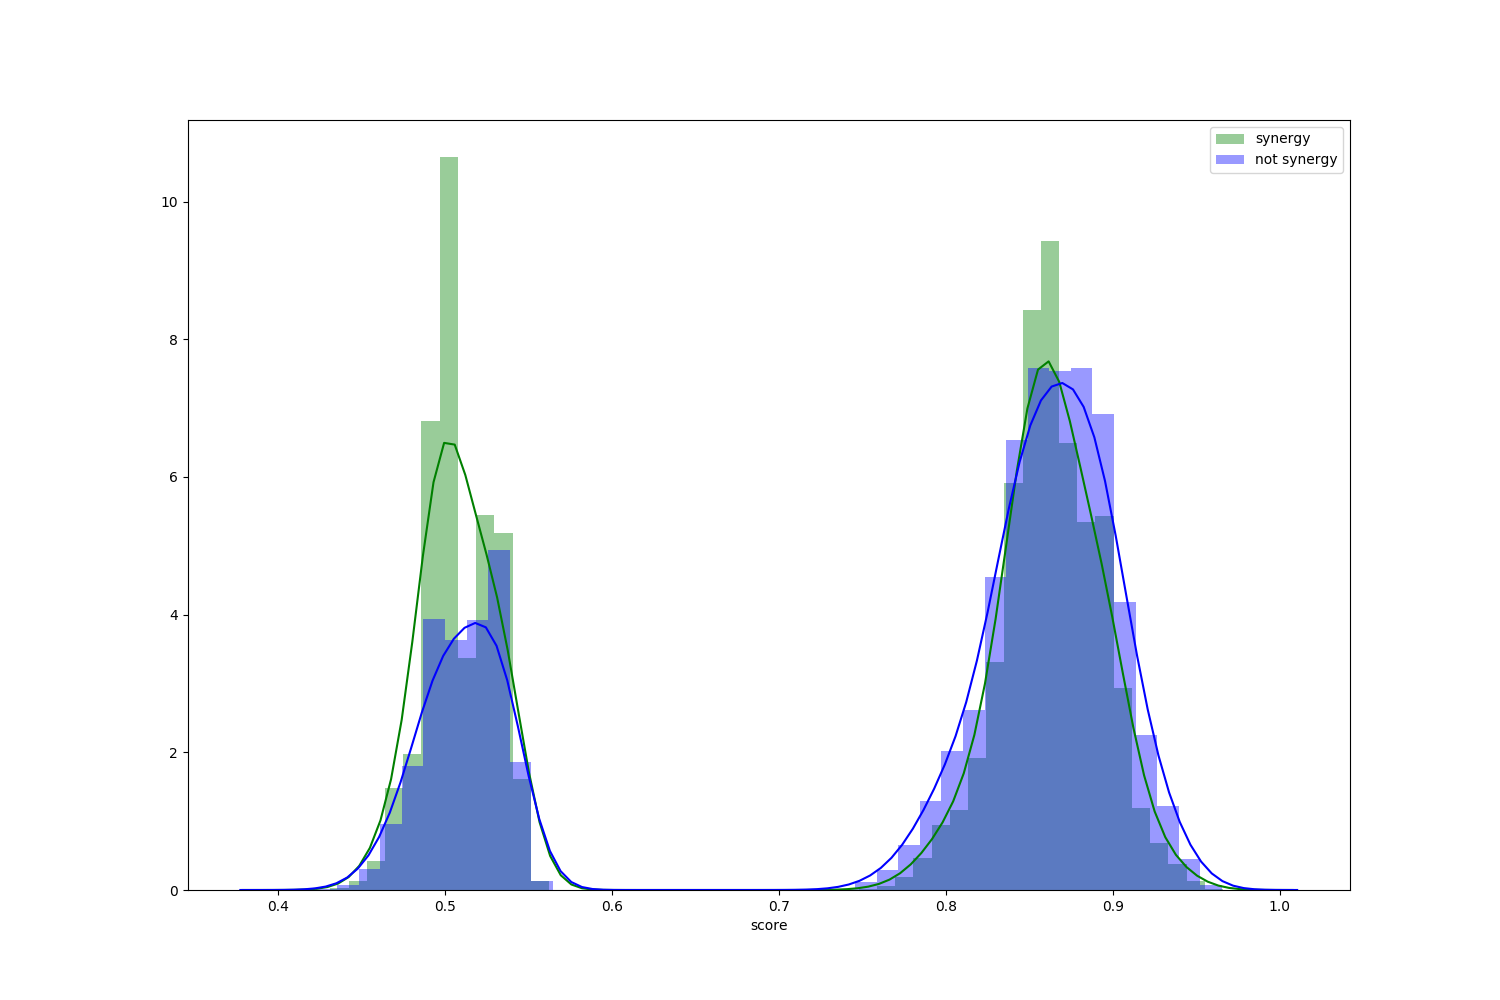

In [7]:
img = Image('Validation_results_Fibroblasts_Induced_Neural_Stem_Cells/Validation_results_Fibroblasts_Induced_Neural_Stem_Cells_bayes_7_metrics_alpha_00001/fig_Fibroblasts_Induced_Neural_Stem_Cells_' + str(id_max) + '.png')
display(img)

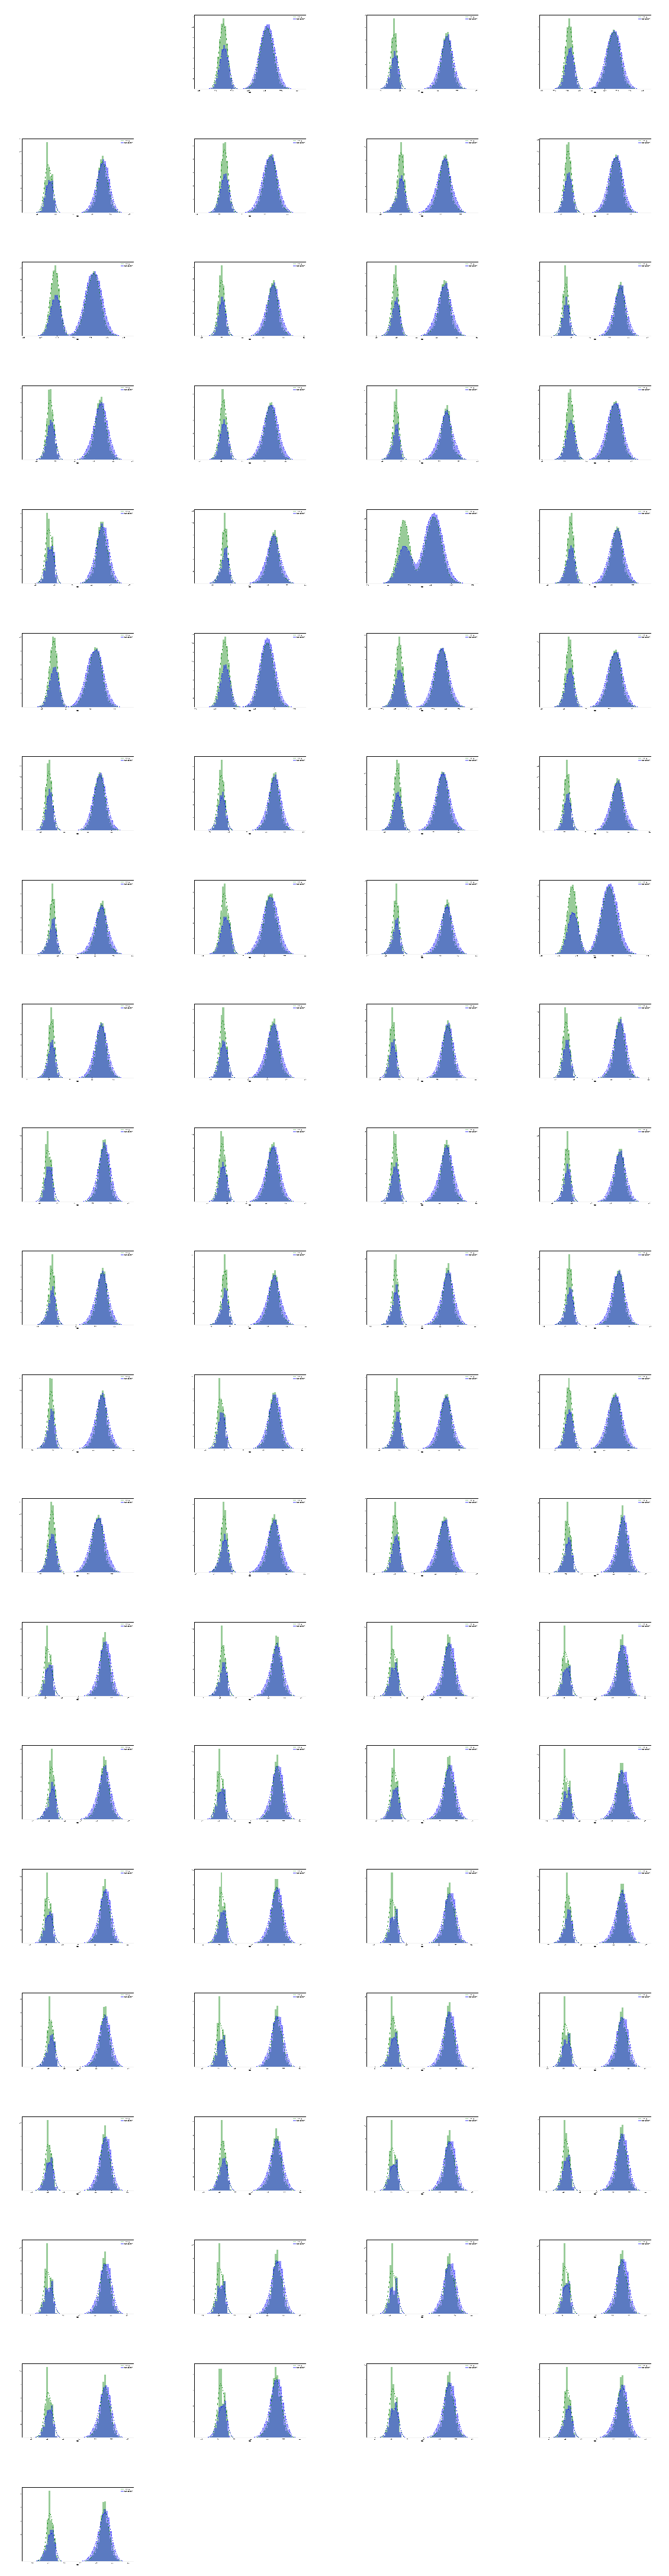

In [11]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

fig = figure( figsize=(20, 80))
col = 4
number_of_images = 81
row = number_of_images/col
if (number_of_images%col != 0):
    row += 1
for i in range(1, number_of_images):
    a=fig.add_subplot(row,col,i+1)
    image = imread('Validation_results_Fibroblasts_Induced_Neural_Stem_Cells/Validation_results_Fibroblasts_Induced_Neural_Stem_Cells_bayes_7_metrics_alpha_00001/fig_Fibroblasts_Induced_Neural_Stem_Cells_' + str(i) + '.png')
    imshow(image)
    axis('off')


In [9]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [12]:
import math

In [22]:
math.log(math.exp(-320))

-320.0

In [25]:
math.log(10**(-320))

-736.8272408909739

In [26]:
math.log10(10**(-320))

-320.000004834948

In [27]:
math.log(0.0)

ValueError: math domain error

In [29]:
x = 10**(-320)
math.log10(x)

-320.000004834948

In [30]:
10**(-320)

1e-320